<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/PyTorch/04_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. ⬇️ Importing libaries and device agnostic code**

In [3]:
# import PyTorch
import torch as t
from torch import nn

# Import torchvision
import torchvision as tv
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# To visualize the data
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from sys import getsizeof
import requests
from pathlib import Path
from tqdm.auto import tqdm
import time
import pandas as pd
import random

In [5]:
print(f"PyTorch version = {t.__version__}")
print(f"TorchVision version = {tv.__version__}")

PyTorch version = 2.3.0+cu121
TorchVision version = 0.18.0+cu121


In [6]:
device = 'cuda' if t.cuda.is_available()  else "cpu"
device

'cpu'

## **2. 📃 Getting the dataset**

### **2.1 ⬇️ Downloading the dataset**

In [7]:
train_data = datasets.FashionMNIST("data", True, ToTensor(), None, True)
test_data = datasets.FashionMNIST("data", False, ToTensor(), None, True)

100%|██████████| 26421880/26421880 [00:01<00:00, 16844441.07it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274016.46it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4994058.90it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8077918.81it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### **2.2 📊 Explore the data**

In [8]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [9]:
dt, lbl = train_data[0]

dt.shape, lbl

(torch.Size([1, 28, 28]), 9)

In [10]:
class_name = train_data.class_to_idx
class_name

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
train_data[0][0].untyped_storage().nbytes()/1000

3.136

#### **Arrays**

In [13]:
a = np.array([
    [[1,1,1], [2,2,2], [3,3,3],[4,4,4],[5,5,5]],
    [[11,1,1], [22,2,2], [33,3,3],[44,4,4],[55,5,5]],
    [[111,1,1], [222,2,2], [333,3,3],[444,4,4],[555,5,5]],
    [[1111,1,1], [2222,2,2], [3333,3,3],[4444,4,4],[5555,5,5]],
    [[11111,1,1], [22222,2,2], [33333,3,3],[44444,4,4],[55555,5,5]]
    ])

a.shape

(5, 5, 3)

In [14]:
a

array([[[    1,     1,     1],
        [    2,     2,     2],
        [    3,     3,     3],
        [    4,     4,     4],
        [    5,     5,     5]],

       [[   11,     1,     1],
        [   22,     2,     2],
        [   33,     3,     3],
        [   44,     4,     4],
        [   55,     5,     5]],

       [[  111,     1,     1],
        [  222,     2,     2],
        [  333,     3,     3],
        [  444,     4,     4],
        [  555,     5,     5]],

       [[ 1111,     1,     1],
        [ 2222,     2,     2],
        [ 3333,     3,     3],
        [ 4444,     4,     4],
        [ 5555,     5,     5]],

       [[11111,     1,     1],
        [22222,     2,     2],
        [33333,     3,     3],
        [44444,     4,     4],
        [55555,     5,     5]]])

In [15]:
b=a.reshape((3,5,5))
b

array([[[    1,     1,     1,     2,     2],
        [    2,     3,     3,     3,     4],
        [    4,     4,     5,     5,     5],
        [   11,     1,     1,    22,     2],
        [    2,    33,     3,     3,    44]],

       [[    4,     4,    55,     5,     5],
        [  111,     1,     1,   222,     2],
        [    2,   333,     3,     3,   444],
        [    4,     4,   555,     5,     5],
        [ 1111,     1,     1,  2222,     2]],

       [[    2,  3333,     3,     3,  4444],
        [    4,     4,  5555,     5,     5],
        [11111,     1,     1, 22222,     2],
        [    2, 33333,     3,     3, 44444],
        [    4,     4, 55555,     5,     5]]])

In [16]:
transform = transforms.Compose([transforms.ToTensor()])
tensor = transform(a)
tensor

tensor([[[    1,     2,     3,     4,     5],
         [   11,    22,    33,    44,    55],
         [  111,   222,   333,   444,   555],
         [ 1111,  2222,  3333,  4444,  5555],
         [11111, 22222, 33333, 44444, 55555]],

        [[    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5]],

        [[    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5],
         [    1,     2,     3,     4,     5]]])

In [17]:
t.concatenate((t.unsqueeze(tensor[0],-1), t.unsqueeze(tensor[1],-1), t.unsqueeze(tensor[2],-1)),-1)

tensor([[[    1,     1,     1],
         [    2,     2,     2],
         [    3,     3,     3],
         [    4,     4,     4],
         [    5,     5,     5]],

        [[   11,     1,     1],
         [   22,     2,     2],
         [   33,     3,     3],
         [   44,     4,     4],
         [   55,     5,     5]],

        [[  111,     1,     1],
         [  222,     2,     2],
         [  333,     3,     3],
         [  444,     4,     4],
         [  555,     5,     5]],

        [[ 1111,     1,     1],
         [ 2222,     2,     2],
         [ 3333,     3,     3],
         [ 4444,     4,     4],
         [ 5555,     5,     5]],

        [[11111,     1,     1],
         [22222,     2,     2],
         [33333,     3,     3],
         [44444,     4,     4],
         [55555,     5,     5]]])

### **2.3 👀 Visualize the data**

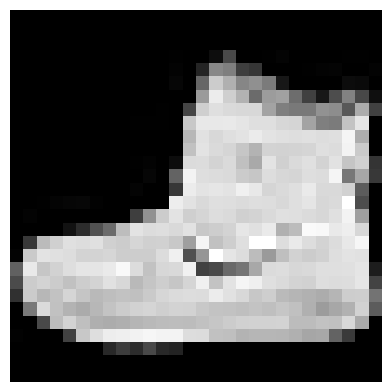

In [18]:
plt.matshow(np.reshape(train_data[0][0].numpy(), (28,28)), cmap='gray')
plt.axis('off');

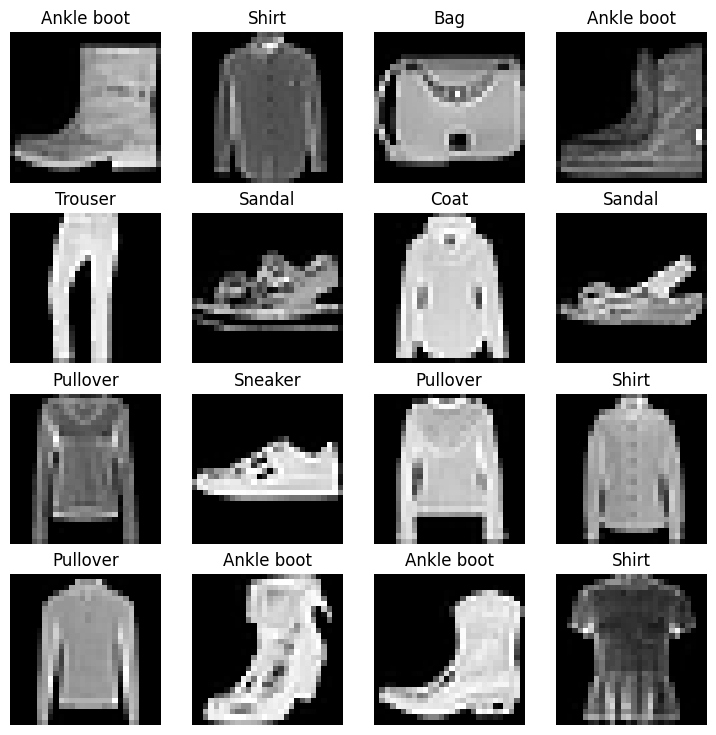

In [19]:
t.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = t.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes[label])
    plt.axis(False);

### **2.4 ⬇️ Data loader - [refer](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files)**

In [20]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

print(train_dataloader, test_dataloader)
print(f"Total batches = {len(train_dataloader)}/{len(train_data)}")
print(f"Total batches = {len(test_dataloader)}/{len(test_data)}")

<torch.utils.data.dataloader.DataLoader object at 0x7f0a182d3d90> <torch.utils.data.dataloader.DataLoader object at 0x7f0a182d1d80>
Total batches = 1875/60000
Total batches = 313/10000


In [21]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [22]:
len(train_dataloader.dataset)

60000

In [23]:
train_dataloader.pin_memory

False

In [24]:
1875*32, 313*32, 10_000/32

(60000, 10016, 312.5)

In [25]:
for i in dir(test_dataloader):
    print(i, end=', ')

_DataLoader__initialized, _DataLoader__multiprocessing_context, _IterableDataset_len_called, __annotations__, __class__, __class_getitem__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __gt__, __hash__, __init__, __init_subclass__, __iter__, __le__, __len__, __lt__, __module__, __ne__, __new__, __orig_bases__, __parameters__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __slots__, __str__, __subclasshook__, __weakref__, _auto_collation, _dataset_kind, _get_iterator, _index_sampler, _is_protocol, _iterator, batch_sampler, batch_size, check_worker_number_rationality, collate_fn, dataset, drop_last, generator, multiprocessing_context, num_workers, persistent_workers, pin_memory, pin_memory_device, prefetch_factor, sampler, timeout, worker_init_fn, 

In [26]:
# see data from the batchs

train_batch_features, train_batch_labels = next(iter(train_dataloader))

train_batch_features.shape, train_batch_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [27]:
len(train_batch_features)

32

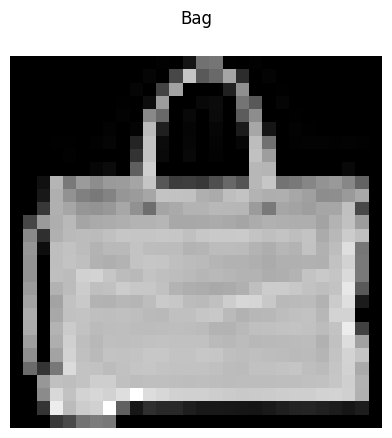

In [28]:
# t.manual_seed(42)
idx = t.randint(0, len(train_batch_labels),(1,)).item()
img, label = train_batch_features[idx], train_batch_labels[idx].item()
plt.matshow(img.squeeze(), cmap='gray')
plt.title(classes[label])
plt.axis(False);

## **3. 🛠️ Model building**

### **3.1 : Flatten layer examples**

In [29]:
train_batch_features[0].shape

torch.Size([1, 28, 28])

In [30]:
flatten = nn.Flatten()
flatten(train_batch_features[0]).shape

torch.Size([1, 784])

In [31]:
# Flattening example

a = t.arange(1,19).reshape(-1,3,3)
a

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]])

In [32]:
flatten(a)

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18]])

### **3.2 🤖 Linear model check**

In [33]:
class linear_base(nn.Module):
    def __init__(self, input_shape:int=784, hidden_shape:int=512, output_shape:int=10):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_shape),
            nn.Linear(in_features=hidden_shape, out_features=output_shape)
        )

    def forward(self, x:t.Tensor):
        return self.sequential(x)

model0 = linear_base().to(device)
model0

linear_base(
  (sequential): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [34]:
list(model0.parameters())[0].device

device(type='cpu')

In [35]:
for i in range(len(list(model0.parameters()))):
    print(list(model0.parameters())[i].shape)

torch.Size([512, 784])
torch.Size([512])
torch.Size([10, 512])
torch.Size([10])


In [36]:
# model prediction without training

dummy_x = t.rand([1,1,28,28])
dummy_x.shape

torch.Size([1, 1, 28, 28])

In [37]:
model0.eval()
with t.inference_mode():
    p = model0(dummy_x)

print(f"Prediction = {p}")

Prediction = tensor([[ 0.1083, -0.0746,  0.0087,  0.0888, -0.2116, -0.4191, -0.1178,  0.2827,
         -0.0625, -0.1795]])


In [38]:
download_link = 'https://raw.githubusercontent.com/Dhamu785/AI-scratch/main/PyTorch/helper_function.py'
if Path("helper_function.py").is_file():
    print("File already exists...:)")
else:
    print("Downloading and writing the file...")
    content = requests.get(download_link).content
    with open("helper_function.py", 'wb') as f:
        f.write(content)

In [39]:
from helper_function import accuracy

ls_fun = nn.CrossEntropyLoss()
opt = t.optim.SGD(params=model0.parameters(), lr=0.01)

### **3.3 🔁 Train and test loop**

In [40]:
pbar = tqdm(range(0,100),desc="Progress check",unit=" numbers")
for i in range(0,50):
    time.sleep(.1)
    pbar.update(2)
    # print(i)
pbar.close()

Progress check:   0%|          | 0/100 [00:00<?, ? numbers/s]

In [41]:
from rich.progress import track

for n in track(range(0,100), description="Processing..."):
    time.sleep(.3)

Output()

In [42]:
# train and test loop
t.manual_seed(42)
st = time.time()
epochs = 10

for epoch in tqdm(range(1,epochs+1)):
    # Model training
    train_loss = 0
    train_accuracy = 0
    epoch_pbar = tqdm(range(len(train_dataloader)), desc="Batch processing",unit="batchs")
    for i,(X,y) in enumerate(train_dataloader):
        model0.train()
        # 1.forward pass
        train_preds = model0(X)

        # 2. Calculate the loss and accuracy
        train_loss_per_batch:t.nn.CrossEntropyLoss = ls_fun(train_preds, y) #----
        train_loss += train_loss_per_batch

        train_accuracy_per_batch = accuracy(y, t.argmax(train_preds, 1))
        train_accuracy += train_accuracy_per_batch

        # 3. zero grade, loss backward and grad step
        opt.zero_grad()
        train_loss_per_batch.backward()
        opt.step()
        epoch_pbar.update(1)
    epoch_pbar.close()
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)

    test_loss = 0
    test_accuracy = 0
    model0.eval()
    with t.inference_mode():
        for x_test, y_test in test_dataloader:
            test_preds = model0(x_test)
            test_loss_per_batch = ls_fun(test_preds, y_test)
            test_loss += test_loss_per_batch

            test_accuracy_per_batch = accuracy(y_test, t.argmax(test_preds, 1))
            test_accuracy += test_accuracy_per_batch
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

    print(f"Epoch {epoch}/{epochs} | train-loss:{train_loss:.4f}, accuracy:{train_accuracy:.4f} | test-loss:{test_loss:.4f}, accuracy:{test_accuracy:.4f}")

print(f"Total time taken = {time.time()-st}s")

  0%|          | 0/10 [00:00<?, ?it/s]

Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 1/10 | train-loss:0.8126, accuracy:74.0617 | test-loss:0.6010, accuracy:79.5527


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 2/10 | train-loss:0.5364, accuracy:81.8617 | test-loss:0.5328, accuracy:81.5595


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 3/10 | train-loss:0.4876, accuracy:83.2800 | test-loss:0.5023, accuracy:82.5679


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 4/10 | train-loss:0.4643, accuracy:83.8717 | test-loss:0.4851, accuracy:83.0871


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 5/10 | train-loss:0.4501, accuracy:84.5067 | test-loss:0.4772, accuracy:83.2069


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 6/10 | train-loss:0.4392, accuracy:84.7450 | test-loss:0.4681, accuracy:83.5264


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 7/10 | train-loss:0.4324, accuracy:85.0533 | test-loss:0.4630, accuracy:83.6861


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 8/10 | train-loss:0.4268, accuracy:85.2067 | test-loss:0.4778, accuracy:83.3067


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 9/10 | train-loss:0.4220, accuracy:85.4650 | test-loss:0.4531, accuracy:83.9756


Batch processing:   0%|          | 0/1875 [00:00<?, ?batchs/s]

Epoch 10/10 | train-loss:0.4182, accuracy:85.5467 | test-loss:0.4541, accuracy:83.8259
Total time taken = 177.45508480072021s


In [43]:
test_loss, test_accuracy = 0,0
pbar = tqdm(range(len(test_dataloader)))
model0.eval()
with t.inference_mode():
    for x_test, y_test in test_dataloader:
        test_preds = model0(x_test)
        test_loss_per_batch = ls_fun(test_preds, y_test)
        test_loss += test_loss_per_batch

        test_accuracy_per_batch = accuracy(y_test, t.argmax(test_preds, 1))
        test_accuracy += test_accuracy_per_batch

        pbar.update(1)

    pbar.close()
    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)

print(f"{test_loss = }, {test_accuracy = }")

  0%|          | 0/313 [00:00<?, ?it/s]

test_loss = tensor(0.4543), test_accuracy = 83.83586261980831


In [44]:
model0.__class__.__name__

'linear_base'

### **3.4 🤖 Non-linear model check**

In [45]:
# model building

class non_linear_model(nn.Module):
    def __init__(self, input_shape:int=784, hidden_units:int=512, output_shape:int=10):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layers(x)

model1 = non_linear_model(784,512,10).to(device)

In [46]:
model1

non_linear_model(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [47]:
next(model1.parameters()).device

device(type='cpu')

In [48]:
# setting optimizer, loss and accuracy

from helper_function import accuracy
accuracy_m1 = accuracy
loss_m1 = nn.CrossEntropyLoss()
optimizer_m1 = t.optim.SGD(params=model1.parameters(), lr=0.01)

In [49]:
# training and testing loop as a function

def train_model(model:nn.Module, data_loader:t.utils.data.DataLoader, loss_fn:nn.Module, optimizer:t.optim.Optimizer, accuracy, device):
    model.to(device)
    model.train()
    train_loss, train_accuracy = 0, 0

    pbar = tqdm(range(len(data_loader)), desc="Train epoch progress", unit="batchs")
    for X,y in data_loader:
        X,y = X.to(device), y.to(device)
        predictions = model(X)

        loss_per_batch = loss_fn(predictions, y)
        accuracy_per_batch = accuracy(y, t.argmax(predictions, 1))

        optimizer.zero_grad()
        loss_per_batch.backward()
        optimizer.step()

        train_loss += loss_per_batch
        train_accuracy += accuracy_per_batch
        pbar.update(1)

    pbar.close()

    train_loss /= len(data_loader)
    train_accuracy /= len(data_loader)

    return train_loss, train_accuracy

def test_model(model:nn.Module, data_loader:t.utils.data.DataLoader, loss_fn:nn.Module, optimizer:t.optim.Optimizer, accuracy, device):
    model.to(device)
    test_loss, test_accuracy = 0, 0
    model.eval()
    # pbar = tqdm(range(len(data_loader)), desc="Test epoch progress", unit="batchs")
    with t.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            predictions = model(X)

            loss_per_batch = loss_fn(predictions, y)
            accuracy_per_batch = accuracy(y, t.argmax(predictions, 1))
            test_loss += loss_per_batch
            test_accuracy += accuracy_per_batch
            # pbar.update(1)

        # pbar.close()
        test_loss /= len(data_loader)
        test_accuracy /= len(data_loader)

    return test_loss, test_accuracy


In [50]:
# training and testing
epochs = 10
pbar = tqdm(range(epochs), "Training", unit="epochs")
for epoch in range(1, epochs+1):
    train_ls, train_acc = train_model(model1, train_dataloader, loss_m1, optimizer_m1, accuracy_m1, device)
    test_ls, test_acc = test_model(model1, test_dataloader, loss_m1, optimizer_m1, accuracy_m1, device)
    pbar.update(1)
    print(f"{epoch}/{epochs} | train: loss={train_ls:.4f}, accuracy={train_acc:.4f} | test: loss={test_ls:.4f}, accuracy={test_acc:.4f}")
pbar.close()

Training:   0%|          | 0/10 [00:00<?, ?epochs/s]

Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

1/10 | train: loss=0.8922, accuracy=72.0117 | test: loss=0.6181, accuracy=78.5443


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

2/10 | train: loss=0.5477, accuracy=81.4117 | test: loss=0.5343, accuracy=81.5994


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

3/10 | train: loss=0.4913, accuracy=83.0983 | test: loss=0.5036, accuracy=82.1486


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

4/10 | train: loss=0.4617, accuracy=84.0683 | test: loss=0.4773, accuracy=83.3766


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

5/10 | train: loss=0.4420, accuracy=84.6383 | test: loss=0.4611, accuracy=83.8558


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

6/10 | train: loss=0.4270, accuracy=85.1450 | test: loss=0.4553, accuracy=83.9956


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

7/10 | train: loss=0.4150, accuracy=85.5667 | test: loss=0.4460, accuracy=84.1653


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

8/10 | train: loss=0.4033, accuracy=85.9567 | test: loss=0.4375, accuracy=84.3450


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

9/10 | train: loss=0.3941, accuracy=86.3767 | test: loss=0.4258, accuracy=84.8942


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

10/10 | train: loss=0.3851, accuracy=86.5850 | test: loss=0.4231, accuracy=85.0739


In [51]:
def model_evaluation(model:nn.Module, data_loader:t.utils.data.DataLoader, loss_fn:nn.Module, optimizer:t.optim.Optimizer, accuracy, device):
    model.to(device)
    test_loss, test_accuracy = 0, 0
    model.eval()
    pbar = tqdm(range(len(data_loader)), desc="Test epoch progress", unit="batchs")
    with t.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            predictions = model(X)

            loss_per_batch = loss_fn(predictions, y)
            accuracy_per_batch = accuracy(y, t.argmax(predictions, 1))
            test_loss += loss_per_batch
            test_accuracy += accuracy_per_batch
            pbar.update(1)

        pbar.close()
        test_loss /= len(data_loader)
        test_accuracy /= len(data_loader)

    return {"Model name": model.__class__.__name__, "Loss":test_loss.item(), "Accuracy":test_accuracy}

model_evaluation(model1, test_dataloader, loss_m1, optimizer_m1, accuracy_m1, device)

Test epoch progress:   0%|          | 0/313 [00:00<?, ?batchs/s]

{'Model name': 'non_linear_model',
 'Loss': 0.42333492636680603,
 'Accuracy': 85.03394568690096}

### **3.5 [CNN](https://poloclub.github.io/cnn-explainer/)**

#### **3.5.1 🛠️ Model building**

In [52]:
t.exp(t.Tensor([2]))

tensor([7.3891])

In [53]:
2.7183**2

7.389154890000001

In [54]:
class cnn_model(nn.Module):
    def __init__(self, input_shape:int, hidden_unit:int, output_shape:int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1), # padding = 'same' or 'valid' also can be used
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_unit, hidden_unit, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_unit, hidden_unit, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2) # default stride value is same as kernel_size
        )
        self.block3 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*7*7, out_features=output_shape)
        )

    def forward(self, x):
        x = self.block1(x)
        # print(x.shape)
        x = self.block2(x)
        # print(x.shape)
        x = self.block3(x)

        return x


In [55]:
t.manual_seed(42)
model2 = cnn_model(1, 10, 10)
model2

cnn_model(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### **3.5.2 Exploring the layers in CNN**

In [56]:
dummy_images = t.rand((32,3,64,64))
dummy_single_img = dummy_images[0]

print(f"Batch shape = {dummy_images.shape}")
print(f"Image shape = {dummy_single_img.shape}")

Batch shape = torch.Size([32, 3, 64, 64])
Image shape = torch.Size([3, 64, 64])


In [57]:
test_conv2d = nn.Conv2d(3,10,3,1,'same') # padding='same'
test_out = test_conv2d(dummy_single_img)
test_out.shape

torch.Size([10, 64, 64])

In [58]:
test_conv2d = nn.Conv2d(3,10,3,1,'valid') # padding='valid'
test_out = test_conv2d(dummy_single_img)
test_out.shape

torch.Size([10, 62, 62])

In [59]:
test_max2d = nn.MaxPool2d(3,1,0)
print(test_max2d(test_out).shape)

torch.Size([10, 60, 60])


#### **3.5.3 Finding the shape**

In [60]:
a,b = train_data[0]
b

9

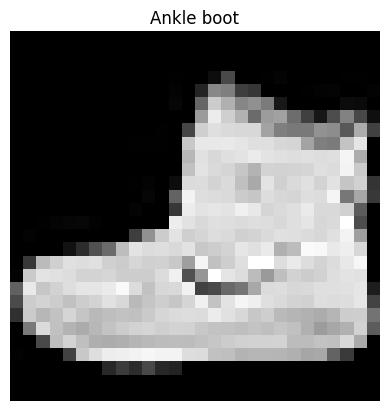

In [61]:
img, lbl = train_data[0]
plt.imshow(t.squeeze(img), cmap='gray')
plt.title(classes[lbl])
plt.axis('off');

In [62]:
img.shape

torch.Size([1, 28, 28])

In [63]:
model2.eval()
with t.inference_mode():
    print(model2(img.unsqueeze(0).to(device))) # RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 490x10)

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]])


#### **3.5.4 Setting loss, accuracy and optimizer**

In [64]:
from helper_function import accuracy

m2_acc = accuracy
m2_loss = nn.CrossEntropyLoss()
m2_optim = t.optim.SGD(params=model2.parameters(), lr=0.1)

#### **3.5.5 Train and test loop**

In [65]:
t.manual_seed(42)
t.cuda.manual_seed(42)

# calculate the time
st = time.time()
epochs = 5
pbar = tqdm(range(5), "Total training progress :", unit="epoch")
for epoch in range(1, epochs+1):
    train_loss, train_acc = train_model(model2, train_dataloader, m2_loss, m2_optim, m2_acc, device)
    test_loss, test_acc = test_model(model2, test_dataloader, m2_loss, m2_optim, m2_acc, device)

    print(f"{epoch}/{epochs} | train: loss={train_loss:.4f}, acc={train_acc:.2f}% | test: loss={test_loss:.4f}, acc={test_acc:.2f}%")
    pbar.update(1)

pbar.close()

print(f"Total time taken for training = {time.time()-st}s")

Total training progress ::   0%|          | 0/5 [00:00<?, ?epoch/s]

Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

1/5 | train: loss=0.5952, acc=78.38% | test: loss=0.3953, acc=85.98%


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

2/5 | train: loss=0.3642, acc=86.86% | test: loss=0.3896, acc=86.13%


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

3/5 | train: loss=0.3247, acc=88.31% | test: loss=0.3500, acc=87.45%


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

4/5 | train: loss=0.3047, acc=89.03% | test: loss=0.3174, acc=88.53%


Train epoch progress:   0%|          | 0/1875 [00:00<?, ?batchs/s]

5/5 | train: loss=0.2899, acc=89.49% | test: loss=0.3419, acc=87.67%
Total time taken for training = 312.8089053630829s


In [66]:
model2_report = model_evaluation(model2, test_dataloader, m2_loss, m2_optim, m2_acc, device)
model2_report

Test epoch progress:   0%|          | 0/313 [00:00<?, ?batchs/s]

{'Model name': 'cnn_model',
 'Loss': 0.3426918685436249,
 'Accuracy': 87.63977635782747}

In [67]:
model1_report = model_evaluation(model1, test_dataloader, loss_m1, optimizer_m1, accuracy_m1, device)
model1_report

Test epoch progress:   0%|          | 0/313 [00:00<?, ?batchs/s]

{'Model name': 'non_linear_model',
 'Loss': 0.42220085859298706,
 'Accuracy': 85.09384984025559}

In [68]:
model0_report = model_evaluation(model0, test_dataloader, loss_m1, optimizer_m1, accuracy_m1, device)
model0_report

Test epoch progress:   0%|          | 0/313 [00:00<?, ?batchs/s]

{'Model name': 'linear_base',
 'Loss': 0.45470166206359863,
 'Accuracy': 83.80591054313099}

## **4. Model report**

In [69]:
report = pd.DataFrame([model0_report, model1_report, model2_report])
report

,Model name,Loss,Accuracy
0,linear_base,0.454702,83.805911
1,non_linear_model,0.422201,85.093850
2,cnn_model,0.342692,87.639776


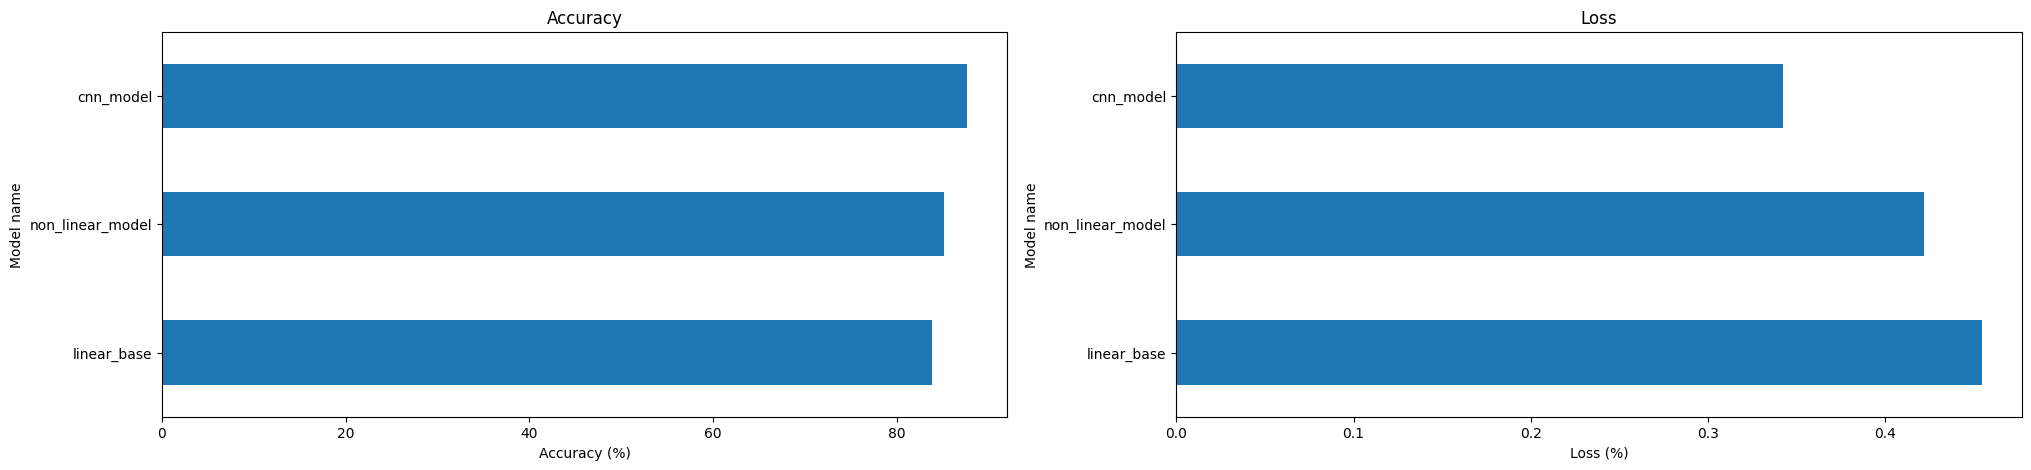

In [70]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
report.set_index('Model name')['Accuracy'].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.title("Accuracy")
plt.subplot(1,2,2)
report.set_index('Model name')['Loss'].plot(kind='barh')
plt.title("Loss")
plt.xlabel("Loss (%)");

## **5. Fitting into the models**

In [71]:
img.shape

torch.Size([1, 28, 28])

In [72]:
model0.eval()
with t.inference_mode():
    print(model0(img.to(device)))

tensor([[-5.9210, -6.4105, -5.8511, -6.1602, -5.7626,  6.6979, -1.8592,  7.8564,
          3.2931, 14.1014]])


In [73]:
model1.eval()
with t.inference_mode():
    print(model1(img.to(device)))

tensor([[ 0.3626,  0.0000,  0.0000,  0.0000,  0.0000, 11.0957,  1.6538, 11.8833,
          7.5791, 18.6019]])


In [74]:
model2.eval()
with t.inference_mode():
    pred = model2(img.unsqueeze(0).to(device))
    print(pred)

tensor([[-5.1971, -6.4328, -5.3098, -3.0125, -1.4421,  3.4344, -0.6179,  5.7621,
          0.5930, 12.4538]])


In [75]:
pred.squeeze()

tensor([-5.1971, -6.4328, -5.3098, -3.0125, -1.4421,  3.4344, -0.6179,  5.7621,
         0.5930, 12.4538])

In [76]:
t.argmax(t.softmax(pred, 1), 1)

tensor([9])

### **5.1 Creating function for prediction**

In [77]:
def predict(model:nn.Module, data:list, device:t.device=device):
    predictions = []
    pbar = tqdm(range(len(data)), desc="Prediction progress", unit="predictions")
    model.eval()
    with t.inference_mode():
        for sample in data:
            pred_logits = model(sample.unsqueeze(0))
            pred_lbl = t.argmax(t.softmax(pred_logits, 1),1).item()
            predictions.append(pred_lbl)
            pbar.update(1)
    pbar.close()

    return predictions

### **5.2 Making predictions**

In [78]:
evl_data = []
evl_lbl = []

for d,l in random.sample(list(test_data), k=9):
    evl_data.append(d)
    evl_lbl.append(l)

print(evl_data[0].shape)
print(evl_lbl[0])

torch.Size([1, 28, 28])
8


In [79]:
res = predict(model2, evl_data)
res, evl_lbl

Prediction progress:   0%|          | 0/9 [00:00<?, ?predictions/s]

([8, 7, 9, 5, 8, 7, 0, 1, 2], [8, 7, 9, 5, 8, 7, 0, 1, 2])

## **6. Model evaluation**

### **6.1 Visualize the predictions**

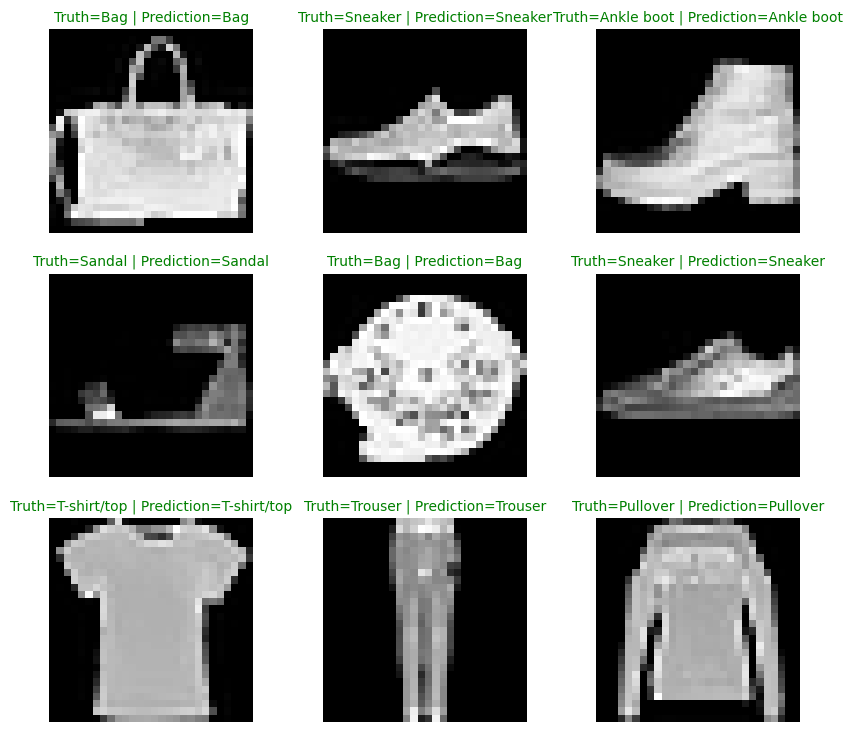

In [80]:
plt.figure(figsize=(10, 9))
nrows = 3
ncols = 3

for i,data in enumerate(evl_data):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(data.squeeze(), cmap='gray')
    pred_lbl = classes[res[i]]
    true_lbl = classes[evl_lbl[i]]

    title = f"Truth={true_lbl} | Prediction={pred_lbl}"
    if pred_lbl == true_lbl:
        plt.title(title, fontsize=10, c='g')
    else:
        plt.title(title, fontsize=10, c='r')
    plt.axis('off')

### **6.2 Confusion matrix**

In [81]:
evl_data = []
evl_lbl = []

for d,l in list(test_data):
    evl_data.append(d)
    evl_lbl.append(l)

print(evl_data[0].shape, evl_lbl[0])
print(f"{len(evl_data) = }")

torch.Size([1, 28, 28]) 9
len(evl_data) = 10000


In [82]:
test_prediction_lbl = predict(model2, evl_data, device)
print(f"{len(test_prediction_lbl) = }")

Prediction progress:   0%|          | 0/10000 [00:00<?, ?predictions/s]

len(test_prediction_lbl) = 10000


In [114]:
# manually checking predictions with true values

print(test_prediction_lbl[10], evl_lbl[10])
# print(test_prediction_lbl)

4 4


In [84]:
# assert int(t.__version__.split('.')[0]) >= 3, "error"

In [85]:
!pip install torchmetrics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.2 MB/s eta 0:00:00


In [86]:
# !pip install mlxtend -U -q # -U upgrade

In [87]:
import mlxtend
import torchmetrics

In [88]:
print(f"{mlxtend.__version__ = }, {torchmetrics.__version__ = }")

mlxtend.__version__ = '0.23.1', torchmetrics.__version__ = '1.4.0.post0'


In [93]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

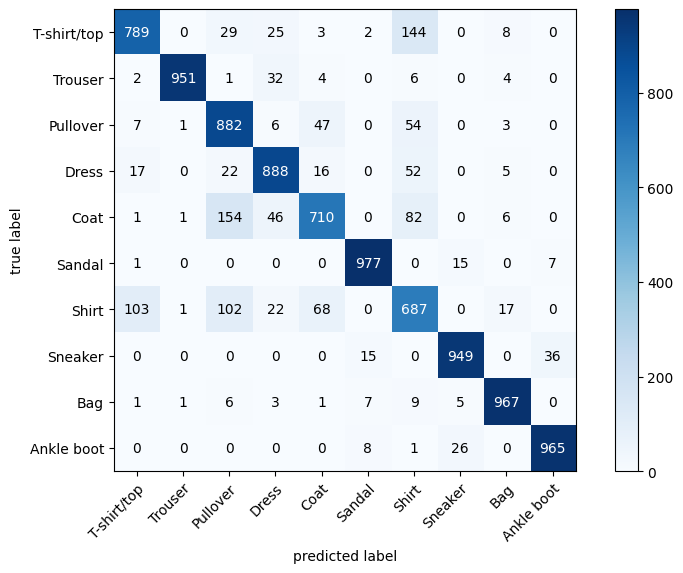

In [107]:
cm = ConfusionMatrix(num_classes=len(classes), task='multiclass')
data_for_plot = cm(preds=t.tensor(test_prediction_lbl), target=t.tensor(evl_lbl))

plot_confusion_matrix(data_for_plot.numpy(), colorbar=True, class_names=classes, figsize=(10,6));

## **7. Saving the model**

In [111]:
# saving the model

path = Path("/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8.1 PyTorch/01_Daniel Bourke/models")
path.mkdir(parents=True, exist_ok=True)

model_name = "04_CNN.pt"
sav_loc = path / model_name
t.save(model2.state_dict(), f=sav_loc)

In [112]:
# Loading the model

t.manual_seed(42)

loaded_model_cnn = cnn_model(1, 10, 10)
loaded_model_cnn.load_state_dict(t.load(sav_loc))
loaded_model_cnn = loaded_model_cnn.to(device)
loaded_model_cnn

cnn_model(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [117]:
# Loaded model evaluation

loaded_mdl_report = model_evaluation(loaded_model_cnn, test_dataloader, m2_loss, m2_optim, m2_acc, device)
loaded_mdl_report

Test epoch progress:   0%|          | 0/313 [00:00<?, ?batchs/s]

{'Model name': 'cnn_model',
 'Loss': 0.342932790517807,
 'Accuracy': 87.62979233226837}

In [115]:
model2_report

{'Model name': 'cnn_model',
 'Loss': 0.3426918685436249,
 'Accuracy': 87.63977635782747}

## **8. Absolute and relative difference**

In [125]:
# https://www.geeksforgeeks.org/python-math-library-isclose-method/

t.isclose(t.tensor(model2_report['Loss']), t.tensor(loaded_mdl_report['Loss']), rtol=0.001)

tensor(True)

## **Notes**
- **Tensorflow** = `data downloading or loading from folder`-[refer](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/DataLoader#gen_dataset)  -> `data loader` -> `data augmentation + model building`-[refer](https://www.tensorflow.org/tutorials/images/data_augmentation)
- **PyTorch** = `data downloading or loading from folder + data augmentation` -> `data loader` -> `model building`-[refer](https://pyimagesearch.com/2021/10/04/image-data-loaders-in-pytorch/)

> `Get data` -> `build model` -> `set loss, accuracy and optimizer` -> `tain and test loop` -> `Model fitting` -> `Model evaluation` -> `Improve model` -> `Save model`

## **References**
- Apple machine learning research - [Doc](https://machinelearning.apple.com/research/panoptic-segmentation)
- TorchVision official documentation - [Doc](https://pytorch.org/vision/stable/index.html)
- Imagenet dataset - [web](https://www.image-net.org/)
- numpy to ToTensor - [gfg](https://www.geeksforgeeks.org/converting-an-image-to-a-torch-tensor-in-python/)
- Different types in table visuals in matplotlib - [Kaggle](https://www.kaggle.com/code/dhamur/per-capita-electricity-consumption-all-countries), [My GitHub](https://github.com/Dhamu785/AI-scratch/blob/main/PyTorch/03_Multi_class_classification.ipynb)
- Image data loaders tutorial - [web](https://pyimagesearch.com/2021/10/04/image-data-loaders-in-pytorch/)

In [89]:
loss = nn.CrossEntropyLoss()
input = t.randn(3, 5, requires_grad=True)
target = t.randn(3, 5).softmax(dim=1)
output = loss(input, target)

In [90]:
type(output)

torch.Tensor

In [91]:
tt:t.nn.CrossEntropyLoss

___